In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

In [14]:
# Load the dataset
df = pd.read_csv('MaunaLoaDailyTemps.csv', index_col='DATE', parse_dates=True)
df = df.dropna()

features = ['AvgTemp', 'MinTemp', 'Sunrise']
data = df[features].values

In [15]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Define sequence length
sequence_length = 30

In [16]:
# Prepare data for training
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length])
    y.append(data_scaled[i+sequence_length])

X, y = np.array(X), np.array(y)

# Reshape X to fit the RNN input shape
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

In [23]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X.shape[1], X.shape[2]), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(3))  
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 32)                1152      
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
 dense_9 (Dense)             (None, 3)                 27        
                                                                 
Total params: 1443 (5.64 KB)
Trainable params: 1443 (5.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Train the model
history = model.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
56/56 [==============================] - 3s 6ms/step - loss: 0.2169
Epoch 2/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0362
Epoch 3/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0331
Epoch 4/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0323
Epoch 5/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0317
Epoch 6/50
56/56 [==============================] - 0s 5ms/step - loss: 0.0288
Epoch 7/50
56/56 [==============================] - 0s 7ms/step - loss: 0.0246
Epoch 8/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0199
Epoch 9/50
56/56 [==============================] - 0s 7ms/step - loss: 0.0155
Epoch 10/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0123
Epoch 11/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0104
Epoch 12/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 13/50
56/56 [==============================

In [25]:
# Make predictions
predictions_scaled = model.predict(X)
predictions = scaler.inverse_transform(predictions_scaled)

56/56 [==============================] - 0s 3ms/step


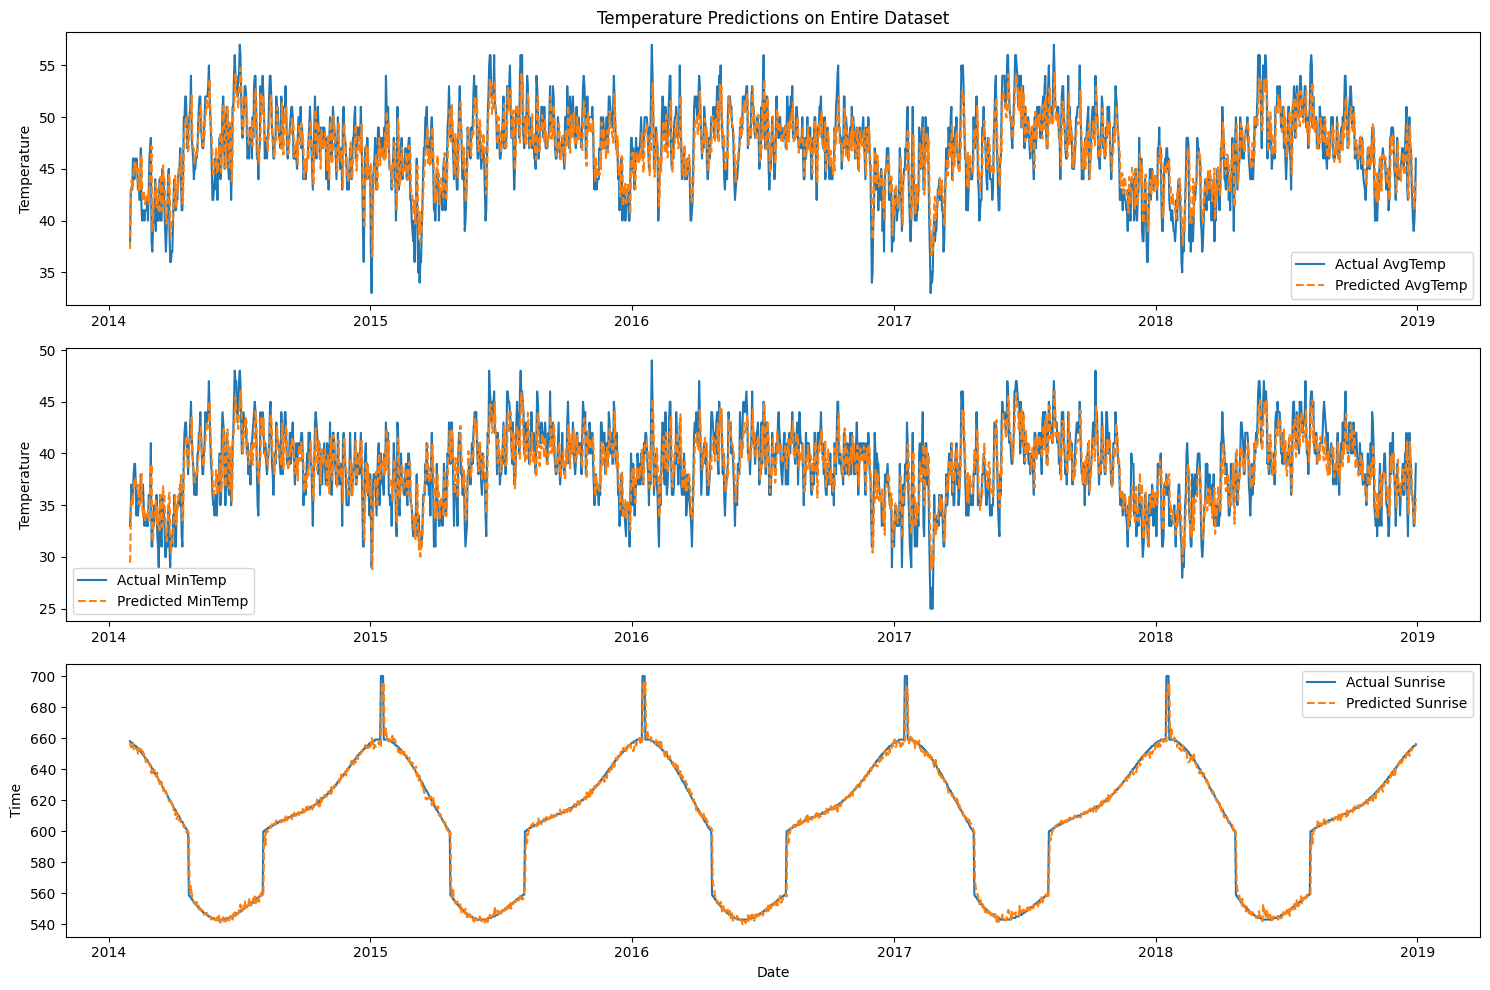

In [27]:
# Plot the results
plt.figure(figsize=(15, 10))

# Plot Actual and Predicted AvgTemp
plt.subplot(3, 1, 1)
plt.plot(df.index[sequence_length:], df['AvgTemp'][sequence_length:], label='Actual AvgTemp')
plt.plot(df.index[sequence_length:], predictions[:, 0], label='Predicted AvgTemp', linestyle='dashed')
plt.title('Temperature Predictions on Entire Dataset')
plt.ylabel('Temperature')
plt.legend()

# Plot Actual and Predicted MinTemp
plt.subplot(3, 1, 2)
plt.plot(df.index[sequence_length:], df['MinTemp'][sequence_length:], label='Actual MinTemp')
plt.plot(df.index[sequence_length:], predictions[:, 1], label='Predicted MinTemp', linestyle='dashed')
plt.ylabel('Temperature')
plt.legend()

# Plot Actual and Predicted Sunrise
plt.subplot(3, 1, 3)
plt.plot(df.index[sequence_length:], df['Sunrise'][sequence_length:], label='Actual Sunrise')
plt.plot(df.index[sequence_length:], predictions[:, 2], label='Predicted Sunrise', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Time')
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Extracting actual and predicted values for each feature
actual_avg_temp = df['AvgTemp'][sequence_length:].values
actual_min_temp = df['MinTemp'][sequence_length:].values
actual_sunrise = df['Sunrise'][sequence_length:].values

predicted_avg_temp = predictions[:, 0]
predicted_min_temp = predictions[:, 1]
predicted_sunrise = predictions[:, 2]

# Calculate RMSE for each feature
rmse_avg_temp = sqrt(mean_squared_error(actual_avg_temp, predicted_avg_temp))
rmse_min_temp = sqrt(mean_squared_error(actual_min_temp, predicted_min_temp))
rmse_sunrise = sqrt(mean_squared_error(actual_sunrise, predicted_sunrise))

print(f"RMSE for AvgTemp: {rmse_avg_temp}")
print(f"RMSE for MinTemp: {rmse_min_temp}")
print(f"RMSE for Sunrise: {rmse_sunrise}")


RMSE for AvgTemp: 2.339220255140371
RMSE for MinTemp: 2.211141809340807
RMSE for Sunrise: 4.47799895579551


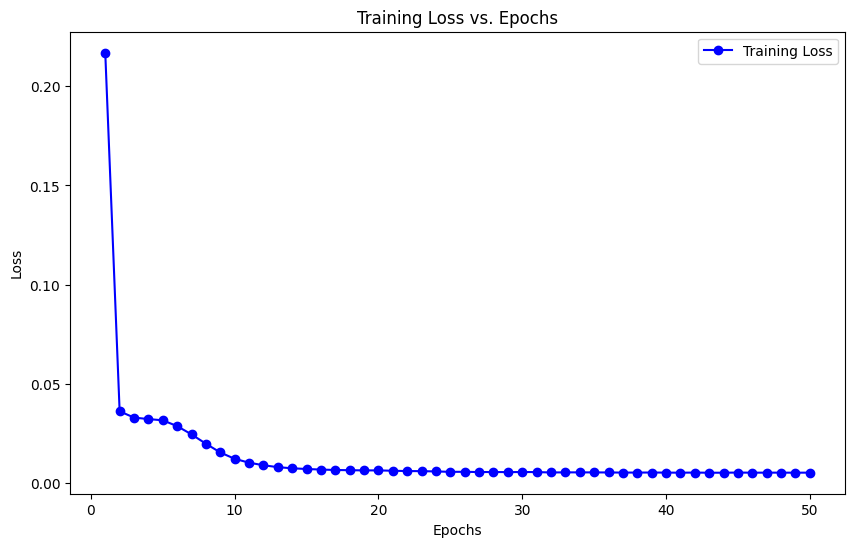

In [35]:
# Plot training loss
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
